In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/imagesclearblur/clear_images/0664.jpg
/kaggle/input/imagesclearblur/clear_images/6234.jpg
/kaggle/input/imagesclearblur/clear_images/1269.jpg
/kaggle/input/imagesclearblur/clear_images/3863.jpg
/kaggle/input/imagesclearblur/clear_images/6241.jpg
/kaggle/input/imagesclearblur/clear_images/2193.jpg
/kaggle/input/imagesclearblur/clear_images/0733.jpg
/kaggle/input/imagesclearblur/clear_images/3750.jpg
/kaggle/input/imagesclearblur/clear_images/2008.jpg
/kaggle/input/imagesclearblur/clear_images/5982.jpg
/kaggle/input/imagesclearblur/clear_images/2081.jpg
/kaggle/input/imagesclearblur/clear_images/6588.jpg
/kaggle/input/imagesclearblur/clear_images/0106.jpg
/kaggle/input/imagesclearblur/clear_images/0375.jpg
/kaggle/input/imagesclearblur/clear_images/3919.jpg
/kaggle/input/imagesclearblur/clear_images/6197.jpg
/kaggle/input/imagesclearblur/clear_images/6399.jpg
/kaggle/input/imagesclearblur/clear_images/3757.jpg
/kaggle/input/imagesclearblur/clear_images/4489.jpg
/kaggle/inpu

In [2]:
# Cell 1: Import necessary libraries and set up the environment
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Input, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set random seed for reproducibility
seed = 42
np.random.seed(seed)
tf.random.set_seed(seed)

# Define paths
clear_images_path = "/kaggle/input/imagesclearblur/clear_images/"
blur_images_path = "/kaggle/input/imagesclearblur/blur_images/"

# Define hyperparameters
batch_size = 16  # Reduced batch size
epochs = 20


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:

# Cell 2: Data Preprocessing
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Define a function to load and preprocess images from directories
def load_and_preprocess_images(image_paths, target_size=(128, 128)):  # Reduced image size
    images = []
    for image_path in image_paths:
        img = load_img(image_path, target_size=target_size)
        img = img_to_array(img)
        img = img / 255.0  # Normalize pixel values to [0, 1]
        images.append(img)
    return np.array(images)

# Get the list of image file paths
clear_image_files = [os.path.join(clear_images_path, filename) for filename in sorted(os.listdir(clear_images_path))]
blur_image_files = [os.path.join(blur_images_path, filename) for filename in sorted(os.listdir(blur_images_path))]

# Load and preprocess images
clear_images = load_and_preprocess_images(clear_image_files)
blur_images = load_and_preprocess_images(blur_image_files)


In [4]:
# Cell 3: Improved Model Architecture
from tensorflow.keras.layers import Conv2D, Input, MaxPooling2D, UpSampling2D, BatchNormalization

def build_deblur_model():
    input_img = Input(shape=(128, 128, 3))  # Adjust the input shape as needed

    # Encoder
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(input_img)
    x = BatchNormalization()(x)
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    encoded = MaxPooling2D((2, 2), padding='same')(x)

    # Decoder
    x = Conv2D(256, (3, 3), activation='relu', padding='same')(encoded)
    x = BatchNormalization()(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = UpSampling2D((2, 2))(x)
    decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

    autoencoder = Model(input_img, decoded)
    autoencoder.compile(optimizer=Adam(learning_rate=1e-3), loss='mean_squared_error')

    return autoencoder

model = build_deblur_model()


In [5]:
# Cell 4: Model Training
model.fit(
    blur_images,  # Input data (blur images)
    clear_images,  # Target data (clear images)
    batch_size=batch_size,
    epochs=epochs,
    verbose=1
)


Epoch 1/20
471/471 [==============================] - 34s 44ms/step - loss: 0.1019
Epoch 2/20
471/471 [==============================] - 20s 43ms/step - loss: 0.0812
Epoch 3/20
471/471 [==============================] - 20s 42ms/step - loss: 0.0553
Epoch 4/20
471/471 [==============================] - 20s 42ms/step - loss: 0.0514
Epoch 5/20
471/471 [==============================] - 20s 43ms/step - loss: 0.0514
Epoch 6/20
471/471 [==============================] - 20s 42ms/step - loss: 0.0513
Epoch 7/20
471/471 [==============================] - 20s 42ms/step - loss: 0.0513
Epoch 8/20
471/471 [==============================] - 20s 42ms/step - loss: 0.0513
Epoch 9/20
471/471 [==============================] - 20s 42ms/step - loss: 0.0513
Epoch 10/20
471/471 [==============================] - 20s 42ms/step - loss: 0.0513
Epoch 11/20
471/471 [==============================] - 20s 42ms/step - loss: 0.0513
Epoch 12/20
471/471 [==============================] - 20s 42ms/step - loss: 0.0513
E

In [6]:
# Cell 5: Save the trained model
model.save("/kaggle/working/deblur_model.h5")

1/1 [==============================] - 0s 18ms/step


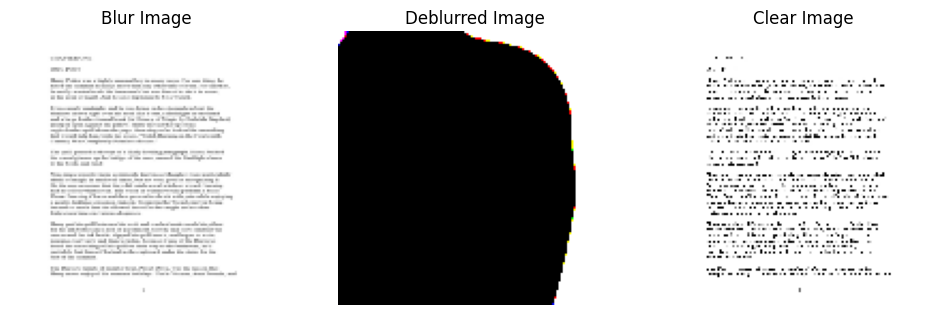

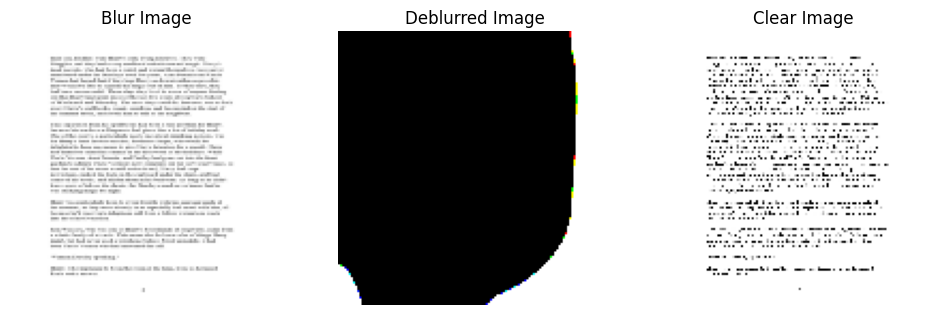

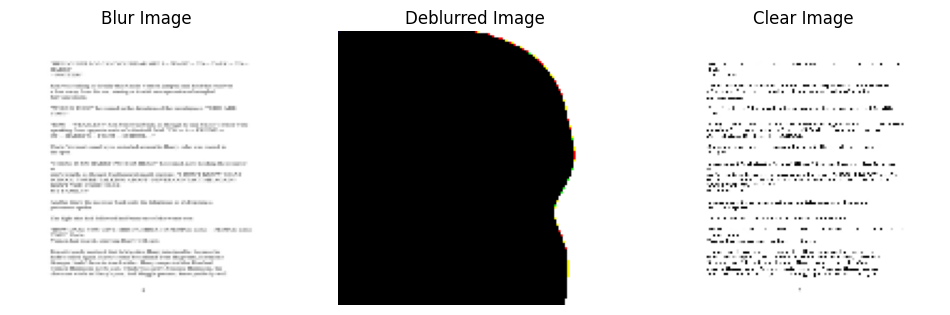

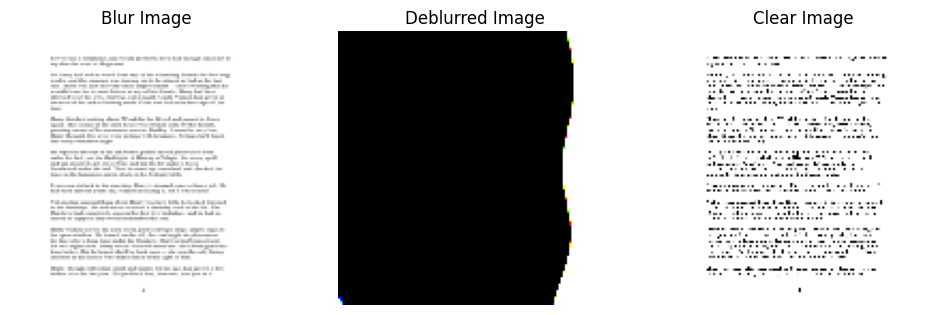

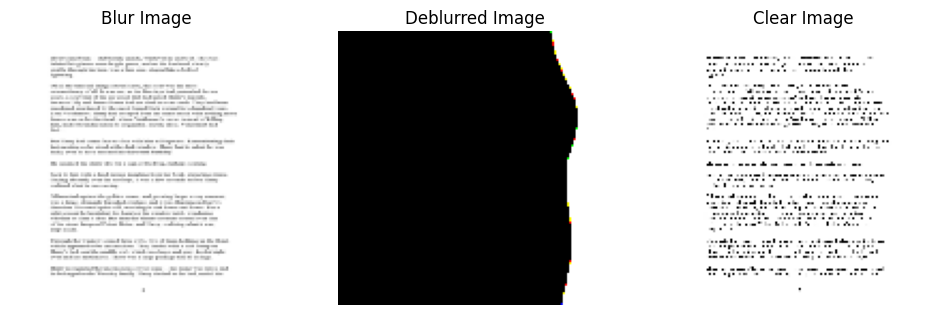

In [7]:
from tensorflow.keras.models import load_model
# Load the saved model
loaded_model = load_model("/kaggle/working/deblur_model.h5")

# File paths for the first few clear and blur images
few_clear_image_paths = [f"/kaggle/input/imagesclearblur/clear_images/{i:04d}.jpg" for i in range(1, 6)]
few_blur_image_paths = [f"/kaggle/input/imagesclearblur/blur_images/{i:04d}.jpg" for i in range(1, 6)]

# Load and preprocess the first few clear and blur images
first_clear_images = [load_and_preprocess_images([image_path]) for image_path in few_clear_image_paths]
first_blur_images = [load_and_preprocess_images([image_path]) for image_path in few_blur_image_paths]

# Perform inference on the first few clear and blur images
deblurred_clear_images = [loaded_model.predict(image) for image in first_blur_images]

# Visualize the original and deblurred images for the first few images
import matplotlib.pyplot as plt

for i in range(len(few_clear_image_paths)):
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 3, 1)
    plt.imshow(first_blur_images[i][0])
    plt.title("Blur Image")
    plt.axis("off")

    plt.subplot(1, 3, 2)
    plt.imshow(deblurred_clear_images[i][0])
    plt.title("Deblurred Image")
    plt.axis("off")
    
    plt.subplot(1, 3, 3)
    plt.imshow(first_clear_images[i][0])
    plt.title("Clear Image")
    plt.axis("off")

    plt.show()


In [8]:
# # Cell 1: Import necessary libraries and set up data generators

# import numpy as np
# import tensorflow as tf
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from tensorflow.keras.layers import Conv2D, UpSampling2D, Input
# from tensorflow.keras.models import Model
# from tensorflow.keras.optimizers import Adam

# # Define image paths
# blur_images_path = '/kaggle/input/imagesclearblur/blur_images'
# clear_images_path = '/kaggle/input/imagesclearblur/clear_images'

# # Define image dimensions
# input_shape = (256, 256, 3)  # Adjust dimensions as needed

# # Set up data generators
# datagen = ImageDataGenerator(rescale=1.0/255.0)  # Normalize pixel values
# batch_size = 32  # Adjust as needed

# blur_data_generator = datagen.flow_from_directory(
#     blur_images_path,
#     target_size=input_shape[:2],
#     batch_size=batch_size,
#     class_mode=None,
#     shuffle=True
# )

# clear_data_generator = datagen.flow_from_directory(
#     clear_images_path,
#     target_size=input_shape[:2],
#     batch_size=batch_size,
#     class_mode=None,
#     shuffle=True
# )


In [9]:
# Cell 1: Import necessary libraries and set up the environment
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Input, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set random seed for reproducibility
seed = 42
np.random.seed(seed)
tf.random.set_seed(seed)

# Define paths
clear_images_path = "/kaggle/input/imagesclearblur/clear_images/"
blur_images_path = "/kaggle/input/imagesclearblur/blur_images/"

# Define hyperparameters
batch_size = 32
epochs = 20

In [10]:
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Define a function to load and preprocess images from directories
def load_and_preprocess_images(image_paths, target_size=(128, 128)):
    images = []
    for image_path in image_paths:
        img = load_img(image_path, target_size=target_size)
        img = img_to_array(img)
        img = img / 255.0  # Normalize pixel values to [0, 1]
        images.append(img)
    return np.array(images)

# Get the list of image file paths
clear_image_files = [os.path.join(clear_images_path, filename) for filename in sorted(os.listdir(clear_images_path))]
blur_image_files = [os.path.join(blur_images_path, filename) for filename in sorted(os.listdir(blur_images_path))]

# Load and preprocess images
clear_images = load_and_preprocess_images(clear_image_files)
blur_images = load_and_preprocess_images(blur_image_files)


In [11]:

# Cell 3: Model Architecture
def build_deblur_model():
    input_img = Input(shape=(128, 128, 3))  # Adjust the input shape as needed

    # Encoder
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(input_img)
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    encoded = MaxPooling2D((2, 2), padding='same')(x)

    # Decoder
    x = Conv2D(128, (3, 3), activation='relu', padding='same')(encoded)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = UpSampling2D((2, 2))(x)
    decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

    autoencoder = Model(input_img, decoded)
    autoencoder.compile(optimizer=Adam(learning_rate=1e-3), loss='mean_squared_error')

    return autoencoder

model = build_deblur_model()


In [12]:
# Cell 4: Model Training
model.fit(
    blur_images,  # Input data (blur images)
    clear_images,  # Target data (clear images)
    batch_size=batch_size,
    epochs=epochs,
    verbose=1
)


Epoch 1/20
236/236 [==============================] - 10s 33ms/step - loss: 0.0527
Epoch 2/20
236/236 [==============================] - 8s 33ms/step - loss: 0.0514
Epoch 3/20
236/236 [==============================] - 8s 33ms/step - loss: 0.0513
Epoch 4/20
236/236 [==============================] - 8s 33ms/step - loss: 0.0513
Epoch 5/20
236/236 [==============================] - 8s 33ms/step - loss: 0.0513
Epoch 6/20
236/236 [==============================] - 8s 33ms/step - loss: 0.0513
Epoch 7/20
236/236 [==============================] - 8s 33ms/step - loss: 0.0522
Epoch 8/20
236/236 [==============================] - 8s 33ms/step - loss: 0.0513
Epoch 9/20
236/236 [==============================] - 8s 33ms/step - loss: 0.0513
Epoch 10/20
236/236 [==============================] - 8s 33ms/step - loss: 0.0513
Epoch 11/20
236/236 [==============================] - 8s 34ms/step - loss: 0.0512
Epoch 12/20
236/236 [==============================] - 8s 33ms/step - loss: 0.0512
Epoch 13/20


In [13]:
# Cell 5: Save the trained model
model.save("/kaggle/working/deblur_model.h5")